In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# N0.1

In [3]:
#Input library yang akan digunakan termasuk data cifar10
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd

import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

170500096/170498071 [==============================] - 11s 0us/step
Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


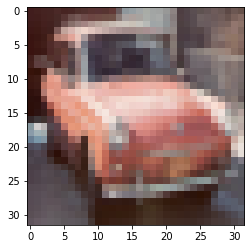

In [4]:
#load dataset cifar10 kemudian menentukan feature train, feature test, label train, label test. Serta tampilkan 1 gambar untuk memastikan
(feature_train, label_train), (feature_test, label_test) = cifar10.load_data()

print("Train", feature_train.shape, label_train.shape)
print("Test", feature_test.shape, label_test.shape)

plt.imshow(feature_train[64], cmap=plt.get_cmap('gray'))

In [5]:
#tampilkan shape dari feature dan label, ternyata dimensinya 3, harus diubah menjadi 1 dimensi
print(feature_train.shape)
print(label_train.shape)
print(feature_test.shape)
print(label_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Feature Engineering

In [6]:
# normalize inputs from 0-255 to 0.0-1.0
feature_train = feature_train.astype('float32')
feature_test = feature_test.astype('float32')
feature_train = feature_train / 255.0
feature_test = feature_test / 255.0

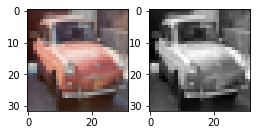

In [7]:
#merubah jadi 1 dimensi atau grayscale (saya dapat dari website)
import matplotlib.pyplot as plt

def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

feature_train_gray = grayscale(feature_train)
feature_test_gray = grayscale(feature_test)

# now we have only one channel in the images
img_channels = 1

# plot a randomly chosen image
img = 64
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(feature_train[img], interpolation='none')
plt.subplot(1, 2, 2)
plt.imshow(feature_train_gray[img, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

In [8]:
print(feature_train_gray.shape)

(50000, 32, 32, 1)


In [9]:
feature_train_gray

array([[[[0.24003921],
         [0.17643139],
         [0.18843138],
         ...,
         [0.5378823 ],
         [0.5120392 ],
         [0.50545096]],

        [[0.07372549],
         [0.        ],
         [0.03968628],
         ...,
         [0.37203923],
         [0.35360783],
         [0.36941177]],

        [[0.094     ],
         [0.03501961],
         [0.12356863],
         ...,
         [0.35474512],
         [0.35709804],
         [0.3152549 ]],

        ...,

        [[0.679451  ],
         [0.6051373 ],
         [0.6166667 ],
         ...,
         [0.5261569 ],
         [0.14062744],
         [0.14964706]],

        [[0.57478434],
         [0.5062353 ],
         [0.56494117],
         ...,
         [0.599451  ],
         [0.2722353 ],
         [0.23494117]],

        [[0.591451  ],
         [0.5366667 ],
         [0.57666665],
         ...,
         [0.7402353 ],
         [0.48690197],
         [0.38862744]]],


       [[[0.67137253],
         [0.5238823 ],
         [0.40

In [10]:
#label dijadikan categorical
from tensorflow.keras.utils import to_categorical

label_train = to_categorical(label_train)
label_test = to_categorical(label_test)

print(label_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
label_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [12]:
#input library untuk training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

MLP

In [13]:
#Training Data menggunakan MLP
base_model = Sequential()

base_model.add(Flatten(input_shape=(32, 32, 1)))
base_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
base_model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

base_model.summary()

history = base_model.fit(feature_train_gray, label_train, batch_size=32, validation_data=(feature_test_gray, label_test), epochs=10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 132,490
Trainable params: 132,490
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0361 - accuracy: 0.2594 - val_loss: 1.9344 - val_accuracy: 0.3188
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9122 - accuracy: 0.3114 - val_loss: 1.8981 - val_accuracy: 0.3170
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8700 - accurac

In [14]:
#plot grafik loss metode MLP
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [15]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,accuracy,val_loss,val_accuracy,epoch
0,2.036074,0.25944,1.934424,0.3188,0
1,1.912215,0.31136,1.898126,0.3170,1
2,1.869967,0.32900,1.872724,0.3349,2
3,1.841288,0.34200,1.865870,0.3325,3
4,1.813234,0.35324,1.831438,0.3451,4
5,1.793535,0.36208,1.779868,0.3642,5
6,1.781018,0.36708,1.787674,0.3632,6
7,1.761026,0.37376,1.801693,0.3630,7
8,1.746623,0.37570,1.768074,0.3692,8
9,1.730537,0.38184,1.751423,0.3726,9


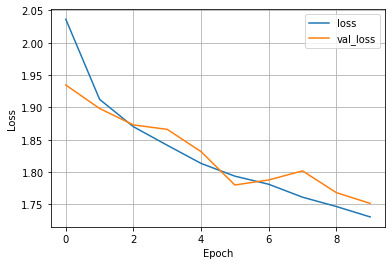

In [16]:
plot_loss(history) # epoch vs loss graph

In [17]:
loss, accuracy = base_model.evaluate(feature_test_gray,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 1s - loss: 1.7514 - accuracy: 0.3726
Test accuracy: 0.3725999891757965
Test loss: 1.7514232397079468


CNN

In [26]:
#training ke 2 menggunakan CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3

model.add(MaxPooling2D((2, 2))) # Pooling

model.add(Flatten()) # Flatten hasil output

# Fully connected layer
model.add(Dense(200, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, salah satu function yang paling banyak dipakai
model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

model.summary()

history_cnn = model.fit(feature_train_gray, label_train, batch_size=128, validation_data=(feature_test_gray, label_test), epochs=10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               1440200   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 1,442,530
Trainable params: 1,442,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 3s 9ms/step - loss: 2.0528 - accuracy: 0.2545 - val_loss

In [27]:
#plot grafik loss metode CNN
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

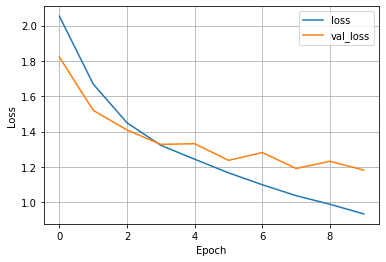

In [28]:
plot_loss(history_cnn) # epoch vs loss graph

In [29]:
loss, accuracy = model.evaluate(feature_test_gray,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 1s - loss: 1.1819 - accuracy: 0.5933
Test accuracy: 0.5932999849319458
Test loss: 1.1819216012954712


Akurasi yg tertinggi ada pada model wider yaitu 59.33% dengan loss 1.18